# <center> Data Science Project: panda_puffs </center>

##### <center> Rebecca Beattie, Van Le, Carmela Santaniello, Ying Zhao </center>


<center><img src="Images/KungFuPandaKick.jpg" width="500"/><center>

This Jupyter notebook contains notes relating to the final project of the 'Data Science' module of the integrated course 'Computational Management of Data' for the masters-level degree in Digital Humanities and Digital Knowledge at the University of Bologna, 2021-2022. It is structured as follows:

1. Descriptive Statistics: General

    1.1. Relational Data
         1.1.1. Introductory Descriptive Statistics
         1.1.2. Visualisations
         1.1.3. Reflections on Descriptive Statistics
         1.1.4. Cleaning the Data Before Creating the Relational Database
         1.1.5. Remarks Prior to the Construction of the Relational Database
         1.1.6. Remarks on Additions to the Relational Query Processor
        
    1.2. Graph Triplestore Data 
         1.2.1. Introductory Descriptive Statistics
         1.2.2. Visualisations
         1.2.3. Reflections on Descriptive Statistics


2. Taking a Look at the JSON Data Files
        2.1. "authors"
        2.2. "venue_id"
        2.3. "references"
        2.4. "publishers"
        
      
3. Description of Project Files
        3.1. Data
        3.2. impl.py
        3.3. results.py
    

<center><img src="Images/KungFuPandaKids2.jpg" width="500"/><center>

## 1. Descriptive Statistics: General

In order to carry out descriptive statistics on the CSV files we use two Pandas methods: the info method and the describe method.

The info method tells us:
* How many rows and columns the file contains
* The name of each column
* How many cells of the file are empty
* The data type of each column

The describe method gives us more statistical information:
* The number of values in each column
* The number of unique values in each column
* The most popular value in each column
* The frequency of the most popular value in each column
* The mean of numerical columns
* The standard deviation of numerical columns
* The minimum value of numerical columns 
* The value of each column at different quartiles (25%, 50%, and 75%)
* The maximum value of numerical columns

### 1.1. Relational Data

#### 1.1.1. Introductory Descriptive Statistics

The following code runs the Pandas info method on the CSV file for the relational database.

In [3]:
from pandas import read_csv

publicationsr = read_csv("relational_publications.csv")
publicationsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    object 
 1   title              500 non-null    object 
 2   type               500 non-null    object 
 3   publication_year   500 non-null    int64  
 4   issue              347 non-null    object 
 5   volume             443 non-null    object 
 6   chapter            22 non-null     float64
 7   publication_venue  498 non-null    object 
 8   venue_type         498 non-null    object 
 9   publisher          498 non-null    object 
 10  event              0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB


We can conclude:
* The CSV file contains 500 rows and 11 columns
* The column names are: "id", "title", "type", "publication_year", "issue", "volume", "chapter", "publication_venue", "venue_type", "publisher", "event"
* The "id", "title", "type", and "publication_year" columns always have a value
* The "issue", "volume", "chapter", "publication_year", "venue_type", and "publisher" columns do not always have a value
* The "event" column never has a value
* The columns "chapter" and "event" contain values considered to be floating numbers, when the UML diagram tells us they should be integers and strings respectively

The following code runs the decribe method on the CSV file for the relational database.

In [4]:
publicationsr.describe(include="all")

,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
count,500,500,500,500.000000,347,443,22.000000,498,498,498,0.0
unique,500,500,2,NaN,31,149,NaN,295,2,32,NaN
top,doi:10.3390/f9040223,A Systematic Review Of Construction And Demoli...,journal-article,NaN,1,11,NaN,Scientometrics,journal,crossref:297,NaN
freq,1,1,478,NaN,69,29,NaN,50,478,145,NaN
mean,NaN,NaN,NaN,2019.558000,NaN,NaN,0.909091,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.512353,NaN,NaN,0.294245,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2014.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2020.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


We can conclude:
* The "id" and "title" columns always have a unique value
* The "type" column only has 2 unique values (when the UML diagram tells us there are 3 - JournalArticle, BookChapter, and ProceedingsPaper)
* The "venue_type" column only has 2 unique values (when the UML diagram tells us there are 3 - Journal, Book, Proceedings)
* Of all the publications in the table, 478 out of 500 are journal articles (we can deduce that the other 22 are book chapters since there are only 2 unique values in the "type" column, and some have chapter numbers - an attribute only associated with books and not proceedings)
* The above is also reflected in the venue type of each publication, with 478 out of 500 publications published in journals
* 498 publications have a publication venue, meaning only 2 do not (in line with the UML diagram which states a publication may have 0 or 1 publication venues)
* 145 of the 500 publications were published by the same publisher 
* The mean year of publication is 2019
* The earliest date of publication is 2014, while the latest is 2018
* The mean chapter number for book chapters is 0.909091 which implies that some publications have a chapter number less than 1

#### 1.1.2. Visualisations

The following code confirms the deduction that all publications are either journals articles or book chapters using the unique method. We can then visualise the elevated frequency of journal articles using the value_counts method followed by the plot method.

In [5]:
publicationsr["type"].unique()

array(['journal-article', 'book-chapter'], dtype=object)

<AxesSubplot:>

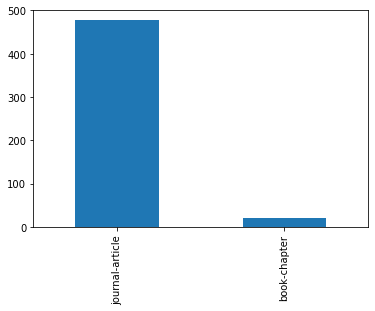

In [6]:
type_countr = publicationsr["type"].value_counts()
type_countr.plot(kind="bar")

For interest, we can visualise the top ten publication venues using a barplot. This shows us that the publication "Scientometrics" is by far the most popular publication venue.

<AxesSubplot:>

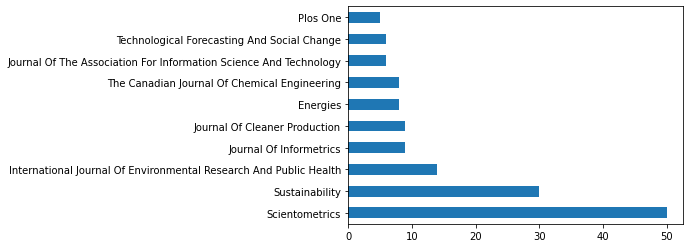

In [7]:
top_venuesr = publicationsr["publication_venue"].value_counts()[:10]
top_venuesr.plot(kind="barh")

We can use the same approach to visualise the top ten publishers, although its informativity is limited due to the use of reference numbers instead of publisher names in this file. Nevertheless, we can see that 3 publishers more or less monopolise the publishing of publications.

<AxesSubplot:>

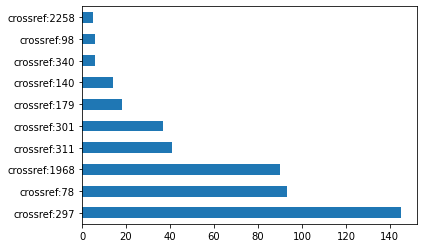

In [8]:
top_publishersr = publicationsr["publisher"].value_counts()[:10]
top_publishersr.plot(kind="barh")

Also for interest, we can visualise how many publications were published in each year using a time series. This confirms the earliest and latest publication dates, and the mean publication date of 2019. It also allows us to see that the number of publications per year started to increase after 2017, dipped a little in 2020 (perhaps corresponding with the Covid pandemic), and rose rapidly between 2020 and 2021.

<AxesSubplot:>

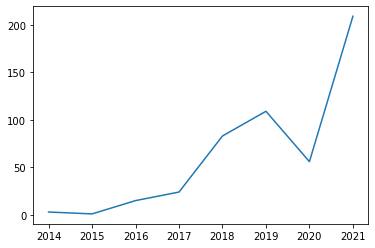

In [9]:
publicationsr_per_year = publicationsr["publication_year"].value_counts()
publicationsr_per_year_sorted = publicationsr_per_year.sort_index()
publicationsr_per_year_sorted.plot()

#### 1.1.3. Reflections on Descriptive Statistics 

After analysing the CSV data using descriptive statistics methods, several aspects are worth highlighting:
* No publications are proceedings papers, meaning no publication venues are proceedings, and no publications have the event attribute
* If we take the "id" column to represent the id attribute of the class IdentifiableEntity, it is worth noting that, for publications, there is never more than 1 value (the UML model indicates that there may be 1 or more)
* Since the mean chapter number is less than 1, we can infer that some publications have been assigned 0 as a chapter number 
* The value for the "publisher" column is a reference number in the form 'crossref:XX(XX)' (which connects to the JSON file)

We can combine these conclusions with some conclusions drawn from manually looking at the file:
* If present, the value for the "issue" column is sometimes an integer, sometimes a date, and once in the form 'ahead-of-print'
* If present, the value for the "volume" column is sometimes an integer, sometimes in the form 'Volume XX', and once in the form 'ahead-of-print'
* The publications with chapter number 0 do not have a value for the "publication_venue", "venue_type", or "publisher" columns
* Some publications are clearly proceedings papers which have been wrongly classified as books

#### 1.1.4. Cleaning the Data Before Creating the Relational Database

Given the above reflections, and in order to ensure that the queries we will carry out on the relational database return responses which are truly faithful to the original data, we have cleaned the relational_publications.csv and the relational_other_data.json files in several ways:
* We identified 15 publications as proceedings papers and re-classified these as such, altering the value for the columns "type", "venue_type", and "event" in the CSV file to reflect this
* Since "ahead-of-print" appeared for the "issue" and "volume" columns in the CSV file of one publication (published in 2021), we replaced these with the real values, obtained from a quick internet search
* We standardised the format of values in the "volume" column of the CSV fule by removing "Volume " from some cells, leaving only the number
* We addressed the publications with chapter "0" in the CSV file by inserting the correct values in columns "chapter", "publication_venue", and "venue_type", obtained from a quick internet search
* We also inserted "Not_Specified" into the "publisher" column of publications that originally had chapter number 0 in the CSV file. Subsequently, we added an entry into the "publishers" dictionary of the JSON file to reflect this, and added the name of the publisher, obtained from a quick internet search (since it was the same publisher in both instances)
* Additionally, for publications that originally had chapter number 0, we added an entry in the "venues_id" dictionary of the JSON file, and added these publications' isbn numbers, obtained from a quick internet search

These alternations were carried out using the code in the file named CodeToCleanRelationalData.py, which makes use of the CSV reader and writer methods, and the JSON load and dump methods. It is conceded that this cleaning process is somewhat manual and unique to this particular dataset, and cannot be universally applied to any similar dataset

The files upon which we constructed the relational database are therefore the cleaned up versions of the original CSV and JSON files, named "clean_relational_publications.csv" and "clean_json_relational_data.json", respectively

To confirm that these changes have occurred, we can take a look at the data in the new CSV file using the same methods as above: info and describe.

In [10]:
from pandas import read_csv
publicationsrclean = read_csv("clean_relational_publications.csv")
publicationsrclean.info()
publicationsrclean.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    object 
 1   title              500 non-null    object 
 2   type               500 non-null    object 
 3   publication_year   500 non-null    int64  
 4   issue              347 non-null    object 
 5   volume             443 non-null    float64
 6   chapter            7 non-null      float64
 7   publication_venue  500 non-null    object 
 8   venue_type         500 non-null    object 
 9   publisher          500 non-null    object 
 10  event              15 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB


,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
count,500,500,500,500.000000,347,443.000000,7.000000,500,500,500,15
unique,500,500,3,NaN,30,NaN,NaN,297,3,33,12
top,doi:10.3390/f9040223,A Systematic Review Of Construction And Demoli...,journal-article,NaN,1,NaN,NaN,Scientometrics,journal,crossref:297,22nd International Conference on Knowledge Eng...
freq,1,1,478,NaN,69,NaN,NaN,50,478,145,3
mean,NaN,NaN,NaN,2019.558000,NaN,94.415350,3.714286,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.512353,NaN,244.443442,5.618846,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2014.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,13.000000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2020.000000,NaN,29.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,108.000000,3.000000,NaN,NaN,NaN,NaN


Most of the changes we can observe here are related to the alteration of publications with value "0" for the "chapter" column, and the alteration of some publications into proceedings papers:
* The average chapter number is no longer less than 1, given that we have inserted the correct chapter numbers for the two publications which had chapter number 0
* There are now 3 unique values for the column "type" instead of only 2
* The "event" column has been populated with 15 values to reflect the 15 publications transformed into proceedings papers 

The following code and visualisation takes a closer look at the change in publication types, confirming that several publications are now re-classified as proceedings papers (although journal articles still far outstrip proceedings papers and book chapters in frequency).

In [11]:
publicationsrclean["type"].unique()

array(['journal-article', 'proceedings-paper', 'book-chapter'],
      dtype=object)

<AxesSubplot:>

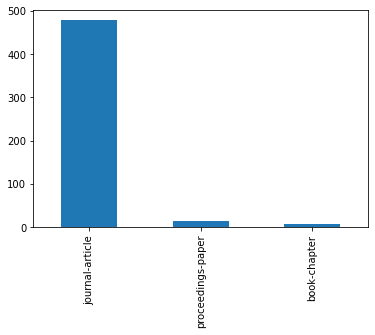

In [12]:
type_countrclean = publicationsrclean["type"].value_counts()
type_countrclean.plot(kind="bar")

#### 1.1.5. Remarks Prior to the Construction of the Relational Database

In order to construct the Pandas DataFrames needed to populate the relational database, several assumptions were made: 
* IdentifiableEntity is the superclass of the classes Person, Publication, Venue, and Organization, meaning that these subclasses inherit its id attribute 
* People, publications, venues, and organisations (i.e. publishers) all have 1 or more ids, as per this attribute's arity in the UML diagram
* The id of each of these classes was assumed to be: Person (the orcid value from the “authors” “dictionary” in the JSON file); Publication (the doi from the "id" column in the CSV file); Venue (the issn and/or isbn value from the “venues_id” “dictionary” of the JSON file); Organization (the crossref value in the “publishers” “dictionary” of the JSON file)
* From inspecting the CSV and JSON files, we can conclude that only the class Venue ever has more than 1 id/issn/isbn value. The classes Person, Publication, and Organization only ever have 1 id value
* This means that only the id attribute of venues (Journal, Book, Proceedings) was considered to be multi-valued, and only this version of id was supplemented by a complementary, VenueId table (accessed by merging the particular venue table with the VenueId table)
* Other multi-valued relations, as per the UML diagram, were considered to be: author (reflected in a table entitled AuthorGroup) and cites (reflected in a table entitled Cites)
* The Pandas DataFrames created to populate the database were therefore: VenueId, AuthorGroup, Cites, Person, Organization, Journal, Book, Proceedings, JournalArticle, BookChapter, and ProceedingsPaper

It was also noted that certain values in the CSV and JSON files incorporated a kind of prefix. For Example:
* dois are in the form "doi:...."
* publisher ids are in the form "crossref:..."
* isbn and issn numbers are in the form "isbn:..." and "issn:..."

These prefixes were left as they are in the construction of the relational database and it was assumed that when inputting parameters into the methods, these would be included. However, it is noted that it could be a possibility to build into these methods a way to accept input without the prefix. Equally it could be a possibility to iterate over the CSV and JSON files prior to constructing the relational database, in order to remove them

<center><img src="Images/KungFuPandaSushi.jpg" width="500"/><center>

#### 1.1.6. Remarks on Additions to the Relational Query Processor

During the construction of the methods associated with the Relational Query Processor, several additions were made to the methods outlined in the UML diagram. 10 methods were added:

* .getMultiValuePublicationInfoDataFrameFromDoi(id : string) : DataFrame - a method which takes the doi of a publication and creates a DataFrame of internal ids related to that publication for the AuthorGroup, Cites, and VenueId tables 
* .getcreateCompletePublicationInfoTableFromDoi(doi : string) : DataFrame - a method which takes the doi of a publication and creates a DataFrame of all basic information about that publication (InternalId, id, title, publicationYear, issue, volume, chapterNumber, type) and which also combines this df with the result of the above, MultiValuePublicationInfoDataFrameFromDoi method
* .getJournalArticle(id : string, volume="" : string, issue="" : string) : DataFrame - a method preventing the repetition of code for 3 of the Relational Query Processor's methods involving Journal objects. This method is called to provide the results of the .getJournalArticlesInIssue, .getJournalArticlesInVolume, and .getJournalArticlesInJournal methods
* .getcreatePublicationObjectFromDoiRelational(doi : string) : Publication - this method is used extensively in the Generic Query Processor in order to create Publication objects in an automated, unrepetitive way. This method uses many of the methods which follow in order to access the information necessary for creating Publication objects. This method was particularly useful for overcoming the mise-en-abyme dilemma of how to create a Publication object which contains Publication objects within it (in the form of its cited publications). This method is able to be called recursively for each publication cited by the initial input publication, with a base case, terminating scenario of a publication having 0 cited publications
* .getVenueIdListByVenueInternalId(id : string) : List[string]
* .getVenueInfoByPublicationId(id : string) : DataFrame
* .getVenueInfoByVenueId(id : string) : DataFrame
* .getAuthorSetByAuthorGroupInternalId(id : string) : Set[Person]
* .getIdsOfCitedPublications(id : string) : List[string]
* .getOrganizationObjectFromPublisherId(id : string) : Organization


The following simple function is also defined before constructing the relational processors:

* CreateListFromDataFrameColumn(DataFrame(), columnName : string) : List[string] - a function enabling the automatic creation of a list from the values of 1 column of a DataFrame


### 1.2. Graph Triplestore Data

#### 1.2.1. Introductory Descriptive Statistics

As before, we can use the info method to gather initial information about the CSV file for the Graph Triplestore.

In [13]:
publicationsg = read_csv("graph_publications.csv")
publicationsg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    object 
 1   title              500 non-null    object 
 2   type               500 non-null    object 
 3   publication_year   500 non-null    int64  
 4   issue              303 non-null    object 
 5   volume             391 non-null    object 
 6   chapter            93 non-null     float64
 7   publication_venue  486 non-null    object 
 8   venue_type         486 non-null    object 
 9   publisher          486 non-null    object 
 10  event              0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB


We can draw exactly the same conclusions as for the CSV file for the relational database. To reiterate:
* The CSV file contains 500 rows and 11 columns
* The column names are: "id", "title", "type", "publication_year", "issue", "volume", "chapter", "publication_venue", "venue_type", "publisher", "event"
* The "id", "title", "type", and "publication_year" columns always have a value
* The "issue", "volume", "chapter", "publication_year", "venue_type", and "publisher" columns do not always have a value
* The "event" column never has a value
* The columns "chapter" and "event" contain values considered to be floating numbers, when the UML diagram tells us they should be integers and strings respectively

The following code uses the describe method to gather more statistical information on the CSV file for the graph triplestore.

In [14]:
publicationsg.describe(include="all")

,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
count,500,500,500,500.000000,303,391,93.000000,486,486,486,0.0
unique,500,497,2,NaN,38,116,NaN,299,2,37,NaN
top,doi:10.1186/s12911-017-0568-4,Cytargetlinker App Update: A Flexible Solution...,journal-article,NaN,1,11,NaN,Applied Sciences,journal,crossref:297,NaN
freq,1,2,407,NaN,63,22,NaN,15,407,173,NaN
mean,NaN,NaN,NaN,2019.132000,NaN,NaN,0.849462,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.775636,NaN,NaN,0.359536,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2011.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2019.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


We can conclude:
* The "id" column always has a unique value
* Unlike in the relational data file, the "title" column does not always have a unique value (one title appears twice, although we can deduce that it appears under a different id value since every value in the "id" column is unique)
* As in the relational data file, the "type" column only has 2 unique values (again, we can conclude that these are journal articles and book chapters, and that no publication is a proceedings paper)
* The above also means that the "venue_type" column, again, only has 2 unique values (and we can deduce these are journals and books)
* Again, most publications in the file, 407 out of 500, are journal articles
* The above is also reflected in the preponderance of journals as the publications' venue type, 407 out of 500
* 486 publications have a publication venue, meaning only 14 do not
* 173 of the 500 publications were published by the same publisher 
* The mean year of publication is ~2019
* The earliest year of publication is 2011, while the latest is 2022
* As in the relational data file, the mean chapter number for book chapters is 0.849462, again implying that some publications have a chapter number less than 1

#### 1.2.2. Visualisations

We can carry out similar visualisations as for the CSV file for relational data. Again, we can use the unique method to confirm no publications are proceedings papers, and then the value_counts method followed by the plot method to visualise this (and to see the dominance of journal articles over book chapters).

In [15]:
publicationsg["type"].unique()

array(['journal-article', 'book-chapter'], dtype=object)

<AxesSubplot:>

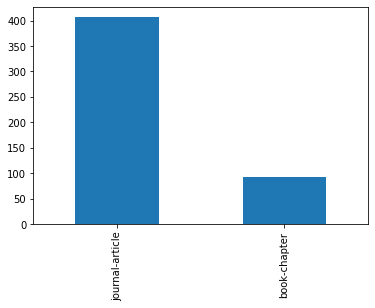

In [16]:
type_countg = publicationsg["type"].value_counts()
type_countg.plot(kind="bar")

Out of interest, we can again use a bar plot to visualise the top ten publication venues. While there is one clear top publication venue ("Applied Sciences"), the venues are, in general, more evenly spread than in the CSV file for the relational database.

<AxesSubplot:>

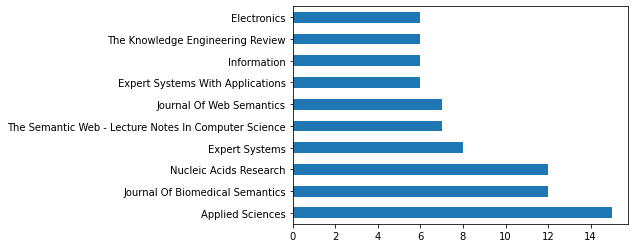

In [17]:
top_venuesg = publicationsg["publication_venue"].value_counts()[:10]
top_venuesg.plot(kind="barh")

We can again carry out the same operation to visualise the top ten publishers of publications. Much like in the relational data, there appears to be a publisher monopoly. Here, just 1 publisher publishes the great majority of publications.

<AxesSubplot:>

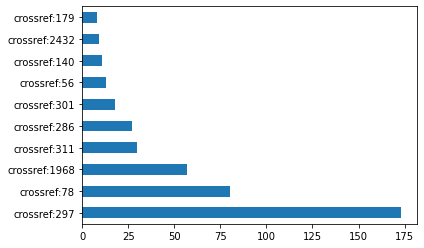

In [18]:
top_publishersg = publicationsg["publisher"].value_counts()[:10]
top_publishersg.plot(kind="barh")

Finally, we can again use a time series to visualise the number of publications per year. We see that the number of publications rose relatively steadily between 2011 and 2121, before crashing suddenly in 2022 (perhaps because this data was collected at the very beginning of the year).

<AxesSubplot:>

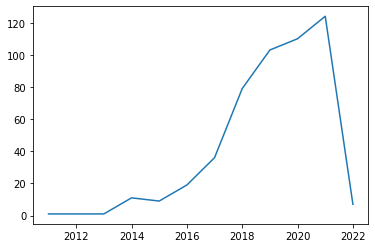

In [19]:
publicationsg_per_year = publicationsg["publication_year"].value_counts()
publicationsg_per_year_sorted = publicationsg_per_year.sort_index()
publicationsg_per_year_sorted.plot()

#### 1.2.3 Reflections on Descriptive Statistics

Analysing the CSV data for the graph triplestore using descriptive statistics methods allows us to draw exactly the same conclusions as for the CSV file for the relational database. To reiterate, these were:
* No publications are proceedings papers, meaning no publication venues are proceedings, and no publications have the event attribute
* If we take the "id" column to represent the id attribute of the class IdentifiableEntity, it is worth noting that, for publications, there is never more than 1 value (the UML model indicates that there may be 1 or more)
* Since the mean chapter number is less than 1, we can infer that some publications have been assigned 0 as a chapter number 
* The value for the "publisher" column is a reference number in the form 'crossref:XX(XX)'


Again, we can combine these conclusions with some conclusions drawn from manually looking at the file:
* If present, the value for the "issue" column is sometimes an integer, sometimes in the form 'YX(X)' where Y is a capital letter and X is a number, and once in the form 'Supplement_1'
* If present, the value for the "volume" column is sometimes an integer, sometimes a four number integer (like a year), and once in the form '809-810'
* Some values for the "title" and "publication_venue" columns have character encoding errors
* Some values for the "publication_venue" column have a title preceded by 'F1000'

<center><img src="Images/KungFuPandaJedi.jpg" width="500"/><center>

## 2. Taking a Look at the JSON Data Files

The JSON files for both the relational database and the graph triplestore are composed of 4 "dictionaries" (the line number indicates the line at which each "dictionary" begins):
* "authors" (relational: line 2, graph: line 2)
* "venues_id" (relational: line 6710, graph: line 8216)
* "references" (relational: line 8449, graph: line 9944)
* "publishers" (relational: line 9286, graph: line 10925)

##### 2.1. "authors"
The value of the “authors” “dictionary” is another “dictionary”. 

The keys of this dictionary are ‘doi’s, and the value is a list of dictionaries. 

Within each dictionary in the list are the keys: 
* “family” (for family name)
* “given” (for first name)
* “orcid” (a type of identification number) in the form “XXXX-XXXX-XXXX-XXXX” where X represents a number or a letter

##### 2.2. "venues_id"

The value of the “venues_id” “dictionary” is another “dictionary”.

The keys of this dictionary are ‘doi’s, and the value is a list.

The list is composed of 1 or more “issn” (in the form “issn:XXXX-XXXX” where X represents a number) or “isbn” (in the form “isbn:XXXXXXXXXXXXX” where X represents a number) numbers.

##### 2.3. "references"

The value of the “references” “dictionary” is another “dictionary”. 

The keys of this dictionary are ‘doi’s, and the value is a list.

The list is composed of 0 or more dois in the form “doi:X” where X represents any combination of letters, numbers, hyphens, full stops, and slashes.

##### 2.4. "publishers"

The value of the “publishers” “dictionary” is another “dictionary”. 

The keys of this dictionary are publisher id codes in the form “crossref:XX(XX)” where X is a number, and the value is another dictionary. 

This dictionary has the keys: 
* “id” (which repeats the "crossref:XX(XX)" key) 
* “Name” (a string of the publisher’s name).

<center><img src="Images/KungFuPandaScream.jpg" width="500"/><center>

## 3. Description of Project Files

### 3.1. Data

The folder entitled "Data" contains all the files of data relating to the project, as well as the python file, "CodeToCleanRelationalData.py", that was used to clean the relational data files before construction of the relational database.

### 3.2. impl.py

The file entitled "impl.py" contains all of the classes, methods, and functions relating to the construction of the various processors which make up the project. It contains various sections (each separated by 5 lines of # symbols for easier identification):

* UML Classes for Python Objects (18 to 147) - containing the information for all of the classes: IdentifiableEntity, Person, Publication (JournalArticle, BookChapter, ProceedingsPaper), Venue (Journal, Book, Proceedings), and Organization
* Relational Processors (157 to 1140) - containing the information for the classes: QueryProcessor, RelationalProcessor, RelationalDataProcessor, and RelationalQueryProcessor
* Triplestore Processors (1150 t0 2581) - containing information for the classes: TriplestoreProcessor, TriplestoreDataProcessor, and TriplestoreQueryProcessor
* Generic Query Processor (2591 to 3003) - containing information for the class GenericQueryProcessor

### 3.3. results.py

The file entitled "results.py" creates a relational database and an RDF triplestore, creates the relational and triplestore query processors, and creates a generic query processor.

It then contains all of the generic query processor methods, some repeated to test the processor with both relational and triplestore data, which can be tested by changing the particular query written inside the print() statement.